In [1]:
# Note that for our dataset, ungulate animals = mule deer, elk.
# One of the main reason for this research was to help farmers,
# ranchers etc to determine if fencing their farms would help
# them prevent losses which occur due to heavy grazing by the
# ungulates. Therefore, some ungulate proof pastures were
# created for the research within the starkey area and one
# such example of that data is the DistEWater which is the
# distance to the nearest water source within the ungulate
# proof area.

# First, lets import the starkey dataset and the habitat data
# and then check both out. Now it is to be noted that since
# the habitat dataset is not an actual trajectory dataset, we
# will just import the habitat dataset as a pandas dataframe.
import matplotlib.pyplot as plt

from Nummobility.core.TrajectoryDF import NumPandasTraj
import pandas as pd
from Nummobility.semantics.semantic_features import SemanticFeatures as sem

pd.set_option('display.max_columns', 500)

pdf = pd.read_csv('./data/starkey.csv')
starkey_traj = NumPandasTraj(data_set=pdf,
                             latitude='lat',
                             longitude='lon',
                             datetime='DateTime',
                             traj_id='Id')
print(starkey_traj)
starkey_traj.head()

------------------------ Dataset Facts ------------------------------

Number of unique Trajectories in the data: 253
Number of points in the data: 287136
Dataset time range: 1196 days 22:51:45
Datatype of the DataFrame: <class 'Nummobility.core.TrajectoryDF.NumPandasTraj'>
Dataset Bounding Box: (45.18896978643169, -118.61020848239596, 45.314545642992, -118.50455596234036)

---------------------------------------------------------------------


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum Species  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409       D   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409       D   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409       D   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409       D   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409       D   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [2]:
# Now, importing the habitat data.
starkey_habitat = pd.read_csv('./data/starkey_habitat.csv')
print(f"The shape of the starkey habitat dataset: {starkey_habitat.shape}")
starkey_habitat.head()

The shape of the starkey habitat dataset: (85969, 19)


,lat,lon,SoilDpth,PerSlope,SINAspct,COSAspct,Convex3,DistCWat,Canopy,Elev,DistEWat,EcoGener,DistOPEN,DistRSTR,DistCLSD,DistEFnc,CowPast,ForgProd,DistEdge
0,45.272378,-118.610193,14,5,-0.81,0.59,500.63,218,3,1389,212,GB,127,2271,30,0,SMITH-BALLY,363,0
1,45.272648,-118.610201,14,5,-0.71,0.71,500.21,228,3,1388,218,GB,150,2293,30,0,SMITH-BALLY,363,0
2,45.272918,-118.610208,14,4,-0.89,0.45,499.93,242,3,1387,228,GB,170,2315,30,0,SMITH-BALLY,363,0
3,45.270224,-118.609750,14,8,-0.98,0.21,500.68,201,5,1393,201,GB,30,2081,134,0,SMITH-BALLY,363,0
4,45.270494,-118.609757,14,7,-0.97,0.22,501.22,190,5,1393,190,GB,30,2101,108,0,SMITH-BALLY,363,0


In [3]:
starkey_habitat['CowPast'].value_counts()

BEAR           38216
SMITH-BALLY    26363
MDWCRK         12830
HALFMOON        6205
HORSE           1444
STRIP            907
NE                 2
Name: CowPast, dtype: int64

In [4]:
%%time

# Checking whether each point in the trajectory is inside
# Smith Bally pasture or not.

# pasture_visited = sem.visited_location(df=starkey_traj,
#                                        geo_layers=starkey_habitat,
#                                        visited_location_name = 'SMITH-BALLY',
#                                        location_column_name='CowPast')
# pasture_visited.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [5]:
small = starkey_traj.reset_index().loc[starkey_traj.reset_index()['traj_id'] == '880109D01']
small = NumPandasTraj(small,
                      latitude='lat',
                      longitude='lon',
                      datetime='DateTime',
                      traj_id='traj_id')
print(small.shape)

pastures = ["BEAR", "SMITH-BALLY"]
pasture = starkey_habitat.loc[starkey_habitat['CowPast'].isin(pastures)]
print(pasture.shape)

(214, 15)
(64579, 19)


In [6]:
%%time

# water = sem.visited_poi(df=small,
#                         surrounding_data=pasture,
#                         dist_column_label='DistEWat',
#                         nearby_threshold=10)
# water.head()

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


In [7]:
from shapely.geometry import Polygon

mini = starkey_habitat.loc[starkey_habitat['CowPast'] == 'BEAR']

coords = list(zip(mini['lon'], (mini['lat'])))
poly = Polygon(coords)
poly.bounds

(-118.5871843366618, 45.18894906057605, -118.50491651227532, 45.25944702133768)

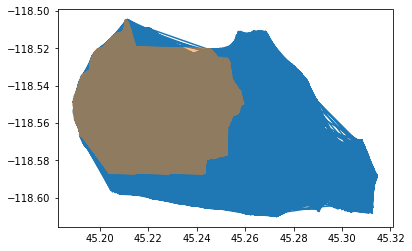

In [8]:
plt.plot(starkey_traj['lat'], starkey_traj['lon']),
plt.plot(mini['lat'], mini['lon'], alpha=0.5)


In [9]:
%%time

filt_traj = sem.trajectories_inside_polygon(starkey_traj, poly)
filt_traj.head()

CPU times: user 3min 2s, sys: 203 ms, total: 3min 3s
Wall time: 3min 3s


lat         lon  StarkeyTime    GMDate  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  45.239682 -118.533204    229902006  21:40:06   
          1995-04-15 12:16:15  45.250521 -118.530438    230069775  20:16:15   
          1995-04-15 21:39:38  45.247943 -118.541455    230103578  05:39:38   
          1995-04-16 03:32:14  45.247429 -118.539530    230124734  11:32:14   
          1995-04-16 04:08:28  45.247117 -118.542579    230126908  12:08:28   

                                 GMTime   LocDate   LocTime  RadNum Species  \
traj_id   DateTime                                                            
880109D01 1995-04-13 13:40:06  19950413  19950413  13:40:06     409       D   
          1995-04-15 12:16:15  19950415  19950415  12:16:15     409       D   
          1995-04-15 21:39:38  19950416  19950415  21:39:38     409       D   
          1995-04-16 03:32:14  19950416  19950416  03:32:14     409       D   
          1995-04-16 04:08:28  19950416  19950416  04:08:28     409       D   

                                 UTME     UTMN  Year  Grensunr  Grensuns  \
traj_id   DateTime                                                         
880109D01 1995-04-13 13:40:06  379662  5010734    95  13:13:00  02:39:00   
          1995-04-15 12:16:15  379895  5011927    95  13:09:00  02:41:00   
          1995-04-15 21:39:38  379039  5011656    95  13:07:00  02:43:00   
          1995-04-16 03:32:14  379188  5011581    95  13:07:00  02:43:00   
          1995-04-16 04:08:28  378938  5011567    95  13:07:00  02:43:00   

                               Obswt  
traj_id   DateTime                    
880109D01 1995-04-13 13:40:06   1.47  
          1995-04-15 12:16:15   1.59  
          1995-04-15 21:39:38   1.34  
          1995-04-16 03:32:14   1.50  
          1995-04-16 04:08:28   1.34

In [10]:
filt_traj.reset_index()['traj_id'].value_counts().keys()

Index(['910313E37', '890424E08', '921228E06', '880119D02', '930202E03',
       '920309D02', '930415D02', '921216E02', '910312E09', '930421E03',
       ...
       'OSUX89141', 'OSUX91038', '940219E07', 'OSUX88176', 'OSUX89203',
       '921130E09', '890317E25', '950126D01', '930409D01', '940219E06'],
      dtype='object', length=230)